# Criando nosso mosaico


## Mosaico

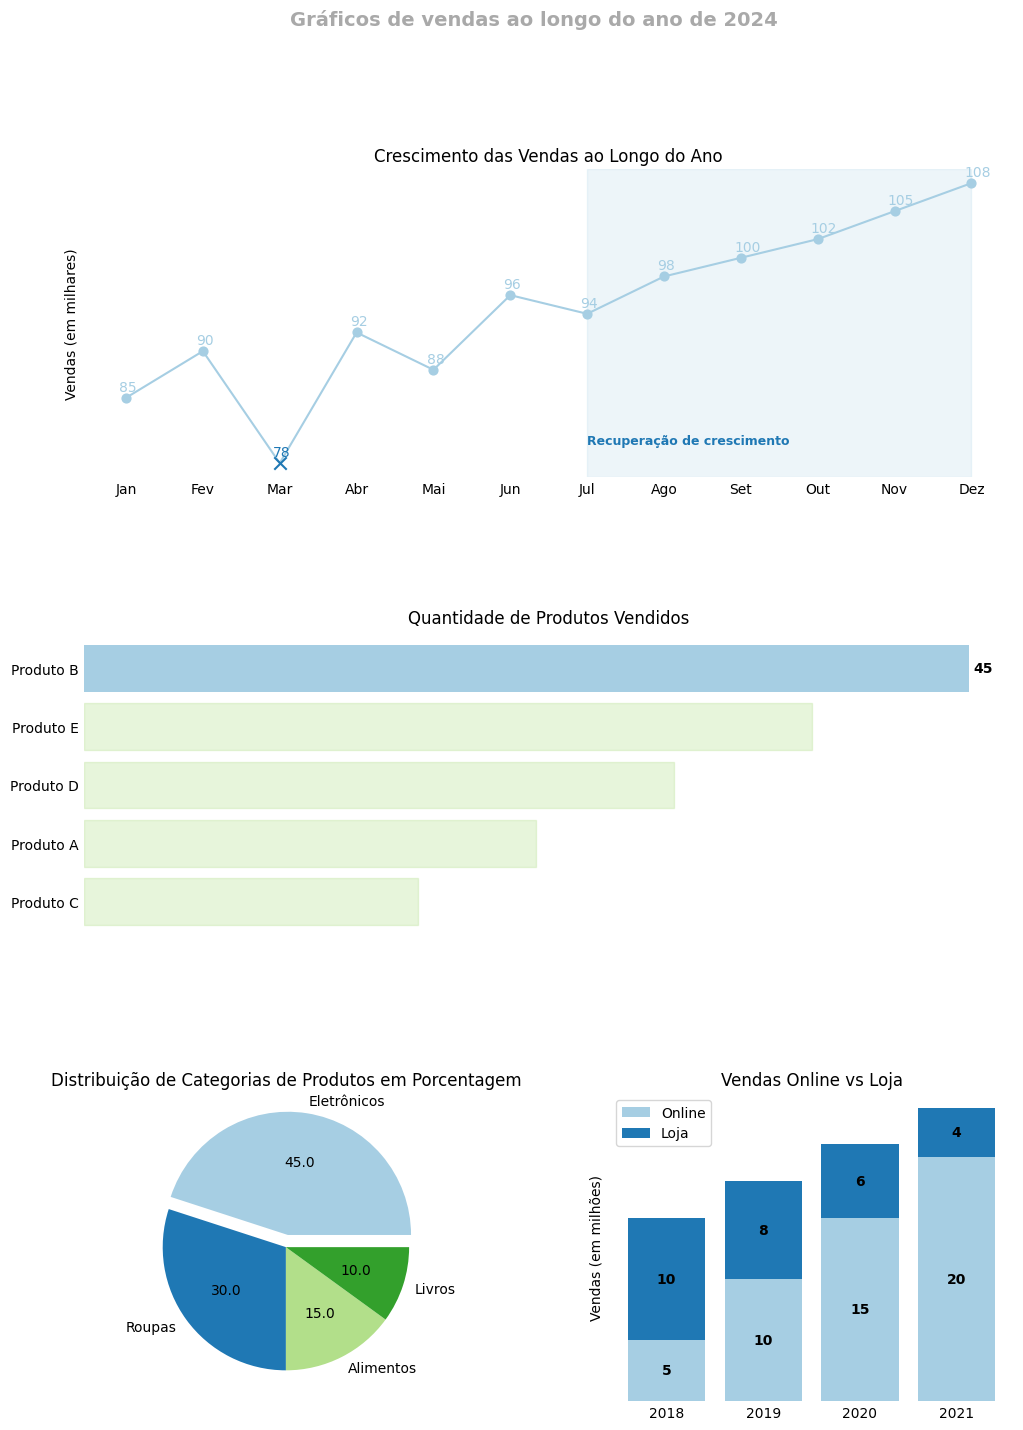

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
vendas = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]

# usando o np where, crie uma lista de marcadores x para o valor mínimo e o para o resto
marcadores = np.where(vendas == np.min(vendas), 'x', 'o')

#cores
cores = plt.get_cmap('Paired').colors
cores_lista = cycler('color', cores)
plt.rc('axes', prop_cycle=cores_lista)

#Criando o mosaico:
mosaico = 'AA;BB;CD'
fig = plt.figure(figsize=(12,16))
espacamento = {'wspace':0.3, 'hspace':0.5}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

#----------------------------------------Gráfico de linhas-----------------------------------

axs['A'].plot(meses, vendas, zorder = 1)

#marcadores
# Pegando a primeira cor do cycler para usar nos marcadores e anotações

for posicao, marcador in enumerate(marcadores):
    if marcador == 'x':
        tamanho = 80
        cor = cores[1]
    else:
        tamanho = 40
        cor = cores[0]
    axs['A'].scatter(meses[posicao], vendas[posicao], marker=marcador, s=tamanho, color=cor, zorder = 2)
    axs['A'].annotate(vendas[posicao], color=cor, xy=(meses[posicao], vendas[posicao]), xytext=(-5, 5), textcoords='offset points')

# adicionando uma anotação para mostrar o menor valor em março
#plt.annotate('Menor Valor', color='black', xy=(2, 78), xytext=(2.2, 78))

#destaque região:
axs['A'].axvspan(6,11, alpha=0.2, color = cores[0], zorder = 0)
axs['A'].text(6, 80, 'Recuperação de crescimento', color=cores[1], fontsize = 9, weight='bold')
axs['A'].set_ylabel('Vendas (em milhares)')
axs['A'].set_frame_on(False)
axs['A'].tick_params(axis='x', length=0)
axs['A'].set_yticks([])
axs['A'].set_title('Crescimento das Vendas ao Longo do Ano')

#----------------------------------------Gráfico de barras-----------------------------------

produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E']
quantidades = [23, 45, 17, 30, 37]
dados_ordenados= sorted(zip(quantidades, produtos))
quantidades_ordenadas = [dado[0] for dado in dados_ordenados]
produtos_ordenados = [dado[1] for dado in dados_ordenados]

#O único valor que vai aparecer é o valor máximo 
rotulos = [valor if valor == max(quantidades_ordenadas) else '' for valor in quantidades_ordenadas]

barras = axs['B'].barh(produtos_ordenados, quantidades_ordenadas)

axs['B'].bar_label(barras, labels=rotulos, padding=3, fontsize=10, fontweight='bold')

# retirando as bordas do gráfico
axs['B'].set_frame_on(False)

# retirando o eixo x
axs['B'].set_xticks([])

# diminuindo os ticks do eixo y
axs['B'].tick_params(axis='y', length=0)

# destacando a barra do produto com maior quantidade vendida
for i, barra in enumerate(barras):
    if i != quantidades_ordenadas.index(max(quantidades_ordenadas)):
        barras[i].set_color(cores[2])
        barras[i].set_alpha(0.3)

# título
axs['B'].set_title('Quantidade de Produtos Vendidos')

#----------------------------------------Gráfico de pizza-----------------------------------

categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros']
quantidades = [45, 30, 15, 10]
destaque = [0.1, 0, 0, 0]  # destacar a primeira fatia


axs['C'].pie(quantidades, labels=categorias, colors=cores, autopct='%.1f', explode=destaque)
axs['C'].set_title('Distribuição de Categorias de Produtos em Porcentagem')

#----------------------------------------Gráfico de barras empilhadas-----------------------------------

anos = [2018, 2019, 2020, 2021]
vendas_online = [5, 10, 15, 20]
vendas_loja = [10, 8, 6, 4]
 
online = axs['D'].bar(anos, vendas_online, label='Online')
loja = axs['D'].bar(anos, vendas_loja, bottom=vendas_online, label='Loja')
axs['D'].bar_label(online, vendas_online, weight = 'bold', label_type='center')
axs['D'].bar_label(loja, vendas_loja, weight = 'bold', label_type='center')

# forçar os anos a serem exibidos como inteiros
axs['D'].set_xticks(anos)
axs['D'].set_yticks([])
axs['D'].tick_params(axis='y',length=0)
axs['D'].tick_params(axis='x',length=0)
axs['D'].set_frame_on(False)
axs['D'].set_ylabel('Vendas (em milhões)')
axs['D'].set_title('Vendas Online vs Loja')
axs['D'].legend()
fig.suptitle('Gráficos de vendas ao longo do ano de 2024', fontsize = 14, weight = 'bold', color = 'darkgrey')
plt.show()
